In [41]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from datetime import datetime

plt.style.use('ggplot')

In [3]:
df = pd.read_csv('sp500_index.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.tail()

,Date,S&P500
2512,2023-05-31,4179.83
2513,2023-06-01,4221.02
2514,2023-06-02,4282.37
2515,2023-06-05,4273.79
2516,2023-06-06,4283.85


In [5]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

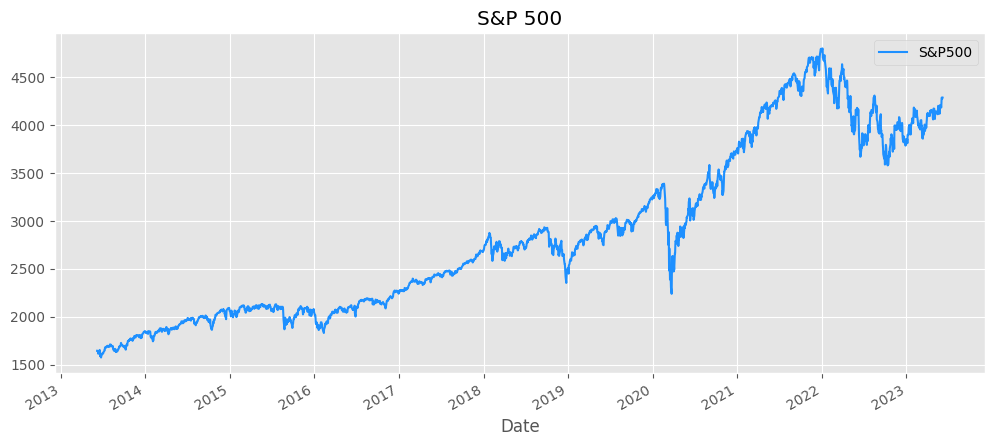

In [6]:
df.plot(style='-',
        figsize=(12,5),
        x='Date',
        y='S&P500',
        title='S&P 500',
        color='dodgerblue')
plt.show()

In [7]:
df_prophet = df.rename(columns={'Date':'ds',
                                'S&P500':'y'})

In [8]:
df_prophet.head()

,ds,y
0,2013-06-07,1643.38
1,2013-06-10,1642.81
2,2013-06-11,1626.13
3,2013-06-12,1612.52
4,2013-06-13,1636.36


In [9]:
%%time
model = Prophet(interval_width=0.95, weekly_seasonality=False)
model.add_country_holidays(country_name='US')
model.fit(df_prophet)

12:44:23 - cmdstanpy - INFO - Chain [1] start processing
12:44:24 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 191 ms, sys: 16.9 ms, total: 208 ms
Wall time: 1.2 s


In [10]:
future = model.make_future_dataframe(periods=30, freq='B')
forecast = model.predict(future)

In [11]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2542,2023-07-12,3892.918826,3623.061185,4121.971718,3874.682909,3909.594260,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-13.453109,-13.453109,-13.453109,0.0,0.0,0.0,3879.465717
2543,2023-07-13,3892.203833,3619.932795,4131.855723,3872.979181,3909.946762,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-10.152198,-10.152198,-10.152198,0.0,0.0,0.0,3882.051635
2544,2023-07-14,3891.488840,3625.407070,4136.273400,3870.880010,3910.530240,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-6.972717,-6.972717,-6.972717,0.0,0.0,0.0,3884.516123
2545,2023-07-17,3889.343861,3648.384506,4155.060929,3866.894684,3909.978495,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.658115,1.658115,1.658115,0.0,0.0,0.0,3891.001976
2546,2023-07-18,3888.628868,3651.579273,4166.736652,3863.666227,3910.393677,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.195295,4.195295,4.195295,0.0,0.0,0.0,3892.824163


<function matplotlib.pyplot.show(close=None, block=None)>

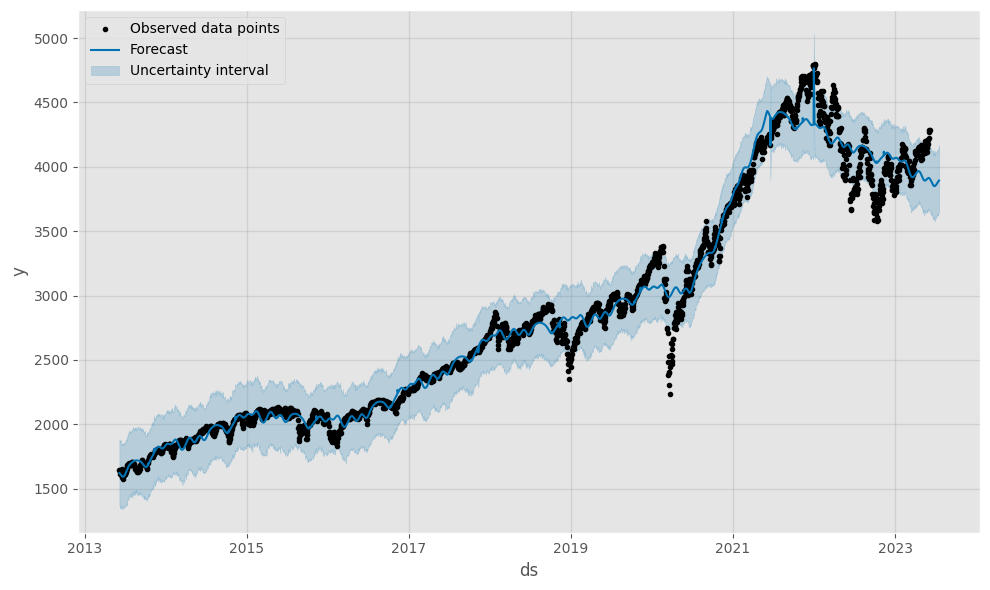

In [12]:
fig = model.plot(forecast)
plt.legend()
plt.show

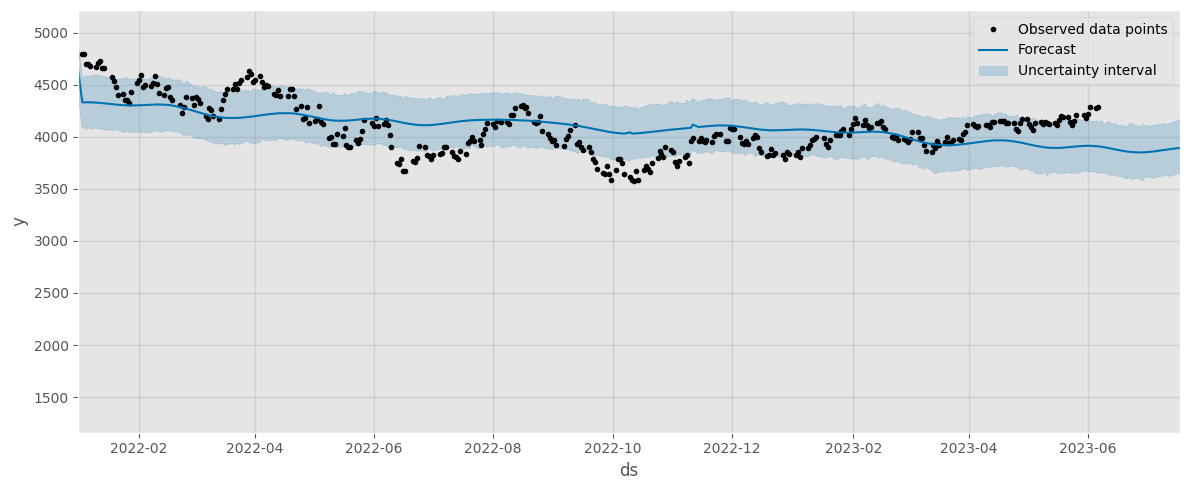

In [36]:
min_value = datetime(2022,1,1)
max_value = forecast['ds'].max()
fig, ax = plt.subplots(figsize=(12,5))
model.plot(forecast, ax=ax, include_legend=True)
ax.set_xlim([min_value, max_value])
plt.show()

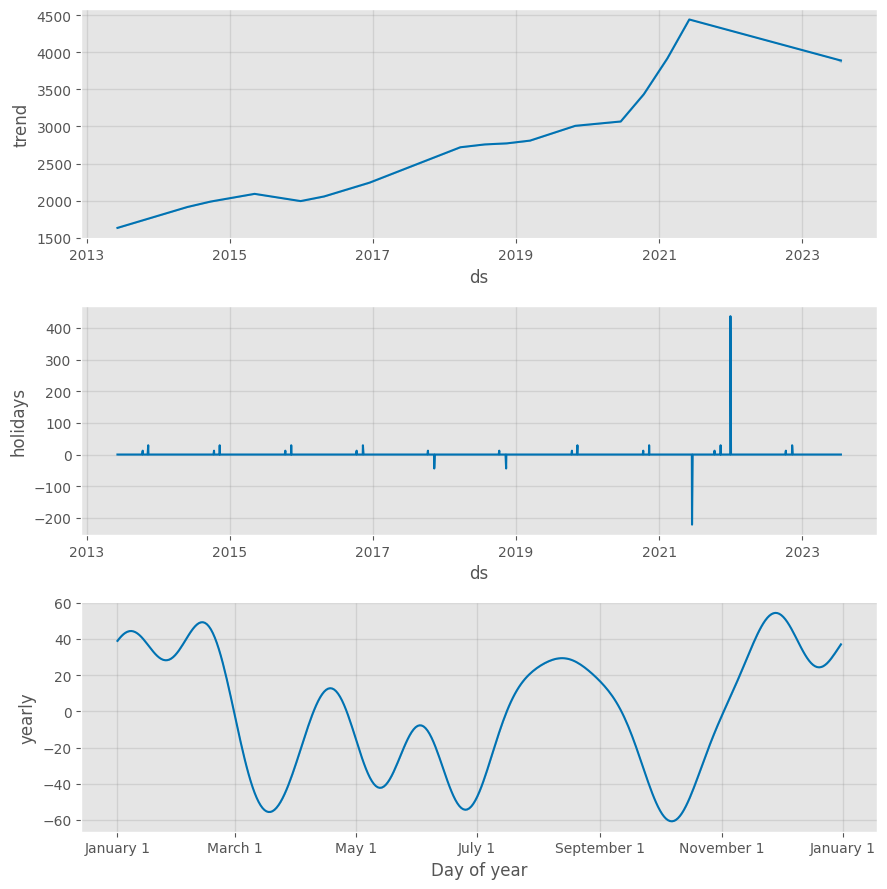

In [14]:
fig2 = model.plot_components(forecast)

In [38]:
forecast_cv = cross_validation(model, horizon='30 days', parallel='processes')

13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] done processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] done processing
13:11:02 - cmdstanpy - INFO - Chain [1] done processing
13:11:02 - cmdstanpy - INFO - Chain [1] done processing
13:11:02 - cmdstanpy - INFO - Chain [1] done processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] done processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1] done processing
13:11:02 - cmdstanpy - INFO - Chain [1] start processing
13:11:02 - cmdstanpy - INFO - Chain [1

In [43]:
forecast_cv_p = performance_metrics(forecast_cv)
forecast_cv_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,51498.543256,226.932905,134.873331,0.040129,0.022960,0.039041,0.634074
1,4 days,56114.901636,236.885841,141.078557,0.041934,0.024145,0.040766,0.604444
2,5 days,58145.064424,241.132877,146.377391,0.043476,0.026405,0.042347,0.565886
3,6 days,59970.827293,244.889419,152.729075,0.045252,0.029109,0.044121,0.549474
4,7 days,57046.314638,238.843703,153.667618,0.045909,0.030885,0.044917,0.524444


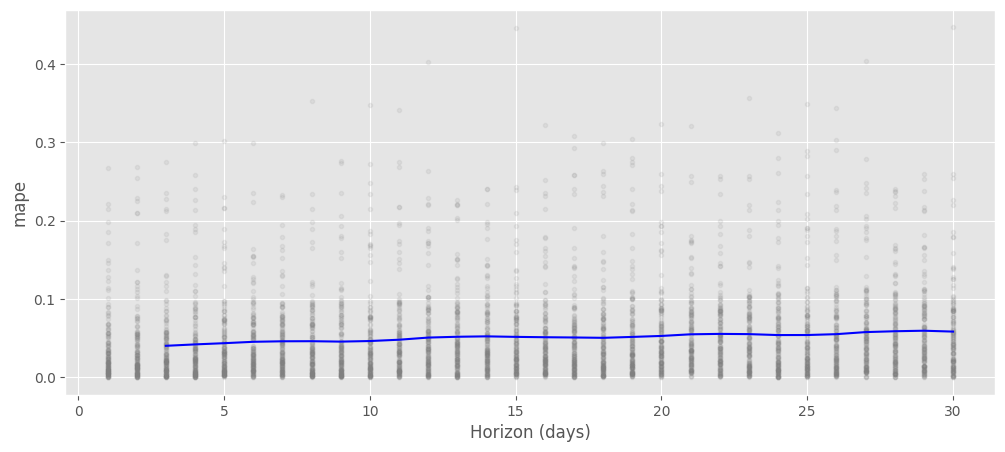

In [48]:
fig, ax = plt.subplots(figsize=(12,5))
plot_cross_validation_metric(forecast_cv, ax=ax, metric='mape')
plt.show()